# **Exploratory Data Analysis**

**Install PySpark**

In [1]:
# Install necessary libraries
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=44a37a504d6a679bb40efaaa501e0e09fad0cca4ab137eecc21efceb9612d66a
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


**Import required library and creating Spark Session**

In [2]:
# Import required libraries
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Exploratory Data Analysis") \
    .getOrCreate()

**Loading dataset from the google drive**

In [3]:
file_path = "/content/drive/MyDrive/DineshThapa/diabetes.csv"
# Load the dataset into a DataFrame
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows of the DataFrame
df.show()

+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|Diabetes_binary|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|
+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|              0|     1|       1|        1| 40|     1|     0|                   0|           0|     0|      1|                0|            1|          0|      5|      18|      15|       1|  0|  9|        4|     3|
|              0|     0|       0|        0| 25|     1|     0|                   0|           1|     0|      0|                0|            

In [23]:
# Display the data types of each column
print(df.dtypes)

[('Diabetes_binary', 'int'), ('HighBP', 'int'), ('HighChol', 'int'), ('CholCheck', 'int'), ('BMI', 'int'), ('Smoker', 'int'), ('Stroke', 'int'), ('HeartDiseaseorAttack', 'int'), ('PhysActivity', 'int'), ('Fruits', 'int'), ('Veggies', 'int'), ('HvyAlcoholConsump', 'int'), ('AnyHealthcare', 'int'), ('NoDocbcCost', 'int'), ('GenHlth', 'int'), ('MentHlth', 'int'), ('PhysHlth', 'int'), ('DiffWalk', 'int'), ('Sex', 'int'), ('Age', 'int'), ('Education', 'int'), ('Income', 'int')]


**Basic Statistical Analysis**

In [21]:
# Calculate basic statistics for all numerical columns
basic_stats = df.describe()
basic_stats.show()

+-------+-------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+--------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+-----------------+------------------+-----------------+
|summary|    Diabetes_binary|             HighBP|          HighChol|         CholCheck|               BMI|             Smoker|             Stroke|HeartDiseaseorAttack|      PhysActivity|            Fruits|            Veggies|  HvyAlcoholConsump|      AnyHealthcare|        NoDocbcCost|           GenHlth|          MentHlth|          PhysHlth|           DiffWalk|               Sex|              Age|         Education|           Income|
+-------+-------------------+-------------------+------------------+------------------+------------------+-------------------+

**Skewness Analysis**

In [24]:
from pyspark.sql.functions import skewness, kurtosis

# Selecting numerical columns
numerical_columns = ['BMI', 'Age', 'PhysHlth', 'MentHlth']

# Compute skewness and kurtosis for each numerical column
for column in numerical_columns:
    skew_kurt = df.select(skewness(df[column]), kurtosis(df[column])).collect()
    skewness_val, kurtosis_val = skew_kurt[0]
    print(f"Skewness of {column}: {skewness_val:.2f}")
    print(f"Kurtosis of {column}: {kurtosis_val:.2f}")

Skewness of BMI: 2.12
Kurtosis of BMI: 11.00
Skewness of Age: -0.36
Kurtosis of Age: -0.58
Skewness of PhysHlth: 2.21
Kurtosis of PhysHlth: 3.50
Skewness of MentHlth: 2.72
Kurtosis of MentHlth: 6.44


**1. Is there a pattern of missing data that needs to be addressed before applying machine learning models?**

In [15]:
from pyspark.sql.functions import col, count, isnan, when

# Check for missing or null values in each column
missing_data = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
missing_data.show()

+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|Diabetes_binary|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|
+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|              0|     0|       0|        0|  0|     0|     0|                   0|           0|     0|      0|                0|            0|          0|      0|       0|       0|       0|  0|  0|        0|     0|
+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+------------

**2. What is the distribution of the target variable?**

+---------------+------+
|Diabetes_binary| count|
+---------------+------+
|              1| 35346|
|              0|218334|
+---------------+------+



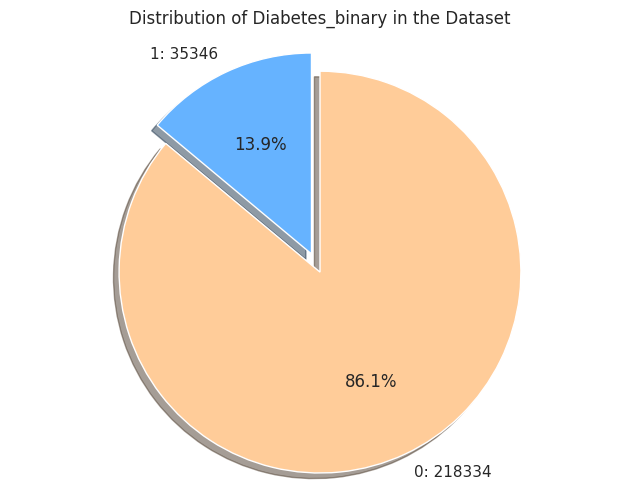

In [6]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Calculate the distribution of the target variable 'Diabetes_binary'
distribution = df.groupBy("Diabetes_binary").count()

# Show the calculated distribution
distribution.show()

# Collect the data to use in a pie chart
distribution_data = distribution.collect()

# Labels for the sections of our pie chart
labels = [str(row['Diabetes_binary']) + ": " + str(row['count']) for row in distribution_data]
sizes = [row['count'] for row in distribution_data]
colors = ['#66b3ff', '#ffcc99']  # Light blue and light orange colors for the pie chart
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Diabetes')

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Diabetes_binary in the Dataset')
plt.show()


**3. How does BMI relate to diabetes prevalence?**

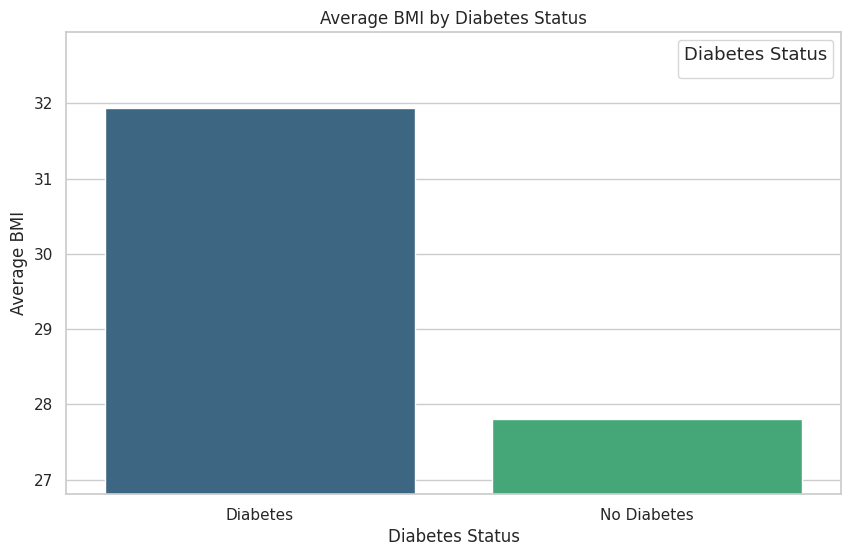

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col

# Set style for seaborn
sns.set(style="whitegrid")

# Group the data by the target variable 'Diabetes_binary' and calculate the average BMI for each group
bmi_diabetes_relation = df.groupBy("Diabetes_binary").agg({"BMI": "mean"}).toPandas()
bmi_diabetes_relation = bmi_diabetes_relation.rename(columns={"avg(BMI)": "Average_BMI", "Diabetes_binary": "Diabetes Status"})

# Convert Diabetes_binary from 0,1 to more descriptive labels if preferred
bmi_diabetes_relation['Diabetes Status'] = bmi_diabetes_relation['Diabetes Status'].map({0: "No Diabetes", 1: "Diabetes"})

# Plotting the average BMI for each diabetes status group
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Diabetes Status", y="Average_BMI", hue="Diabetes Status", data=bmi_diabetes_relation, palette="viridis", dodge=False)
plt.title('Average BMI by Diabetes Status')
plt.ylabel('Average BMI')
plt.xlabel('Diabetes Status')

# Set the Y-axis limits based on the data to increase clarity
y_max = bmi_diabetes_relation['Average_BMI'].max()
y_min = bmi_diabetes_relation['Average_BMI'].min()
ax.set_ylim([y_min - 1, y_max + 1])  # Add some padding to min and max for better visibility

plt.legend(title='Diabetes Status', title_fontsize='13', loc='upper right')
plt.show()


**What is the distribution of BMI across the dataset? Are there differences in BMI distributions between diabetic and non-diabetic individuals?**

In [25]:
from pyspark.sql.functions import col
from pyspark.sql import functions as F

# Compute overall BMI statistics
overall_bmi_stats = df.select("BMI").describe()
overall_bmi_stats.show()

# Compute BMI statistics for diabetic and non-diabetic individuals
bmi_stats_by_diabetes = df.groupBy("Diabetes_binary").agg(
    F.mean("BMI").alias("Mean BMI"),
    F.stddev("BMI").alias("BMI StdDev"),
    F.min("BMI").alias("Min BMI"),
    F.max("BMI").alias("Max BMI")
)
bmi_stats_by_diabetes.show()



+-------+------------------+
|summary|               BMI|
+-------+------------------+
|  count|            253680|
|   mean|28.382363607694735|
| stddev| 6.608694201406007|
|    min|                12|
|    max|                98|
+-------+------------------+

+---------------+-----------------+-----------------+-------+-------+
|Diabetes_binary|         Mean BMI|       BMI StdDev|Min BMI|Max BMI|
+---------------+-----------------+-----------------+-------+-------+
|              1|31.94401063769592|7.363400633798091|     13|     98|
|              0|27.80577005871738|6.291413809060454|     12|     98|
+---------------+-----------------+-----------------+-------+-------+



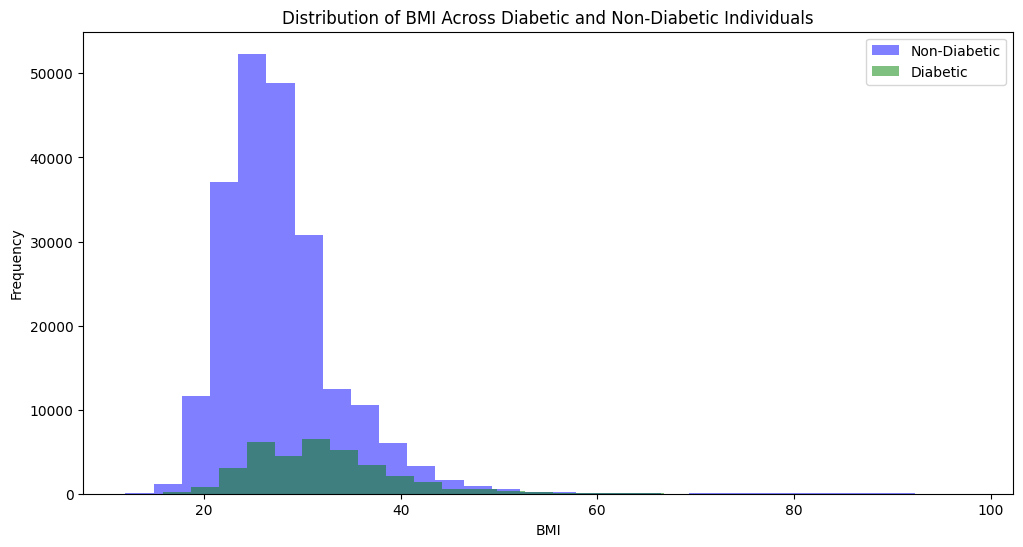

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert data to Pandas for plotting
pandas_df = df.select("Diabetes_binary", "BMI").toPandas()

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(pandas_df[pandas_df['Diabetes_binary'] == 0]['BMI'], bins=30, alpha=0.5, label='Non-Diabetic', color='blue')
plt.hist(pandas_df[pandas_df['Diabetes_binary'] == 1]['BMI'], bins=30, alpha=0.5, label='Diabetic', color='green')
plt.title('Distribution of BMI Across Diabetic and Non-Diabetic Individuals')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**4. Does the presence of High Blood Pressure (HighBP), High Cholesterol (HighChol) correlate with increased diabetes risk?**

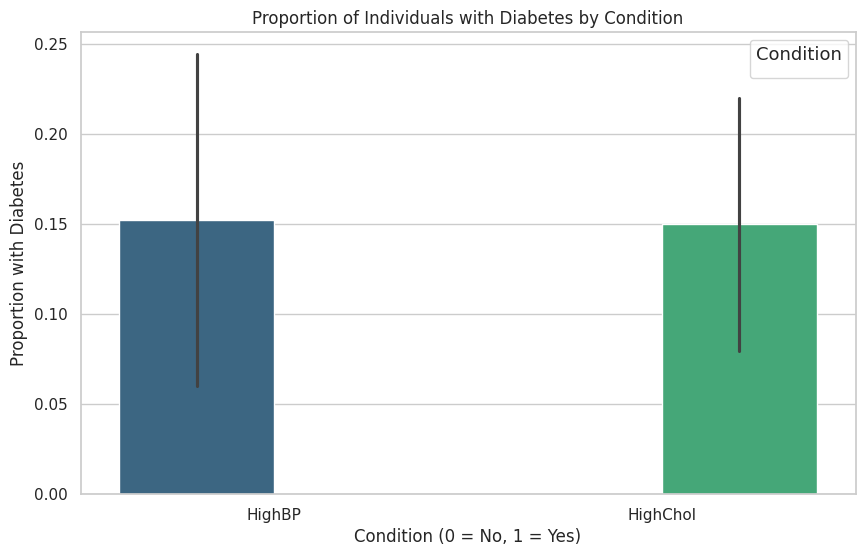

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, avg

# Set the visual style
sns.set(style="whitegrid")

# Calculate the proportion of individuals with diabetes for each state of HighBP and HighChol
highBP_diabetes_df = df.groupBy("HighBP").agg(avg(col("Diabetes_binary")).alias("Proportion_with_Diabetes")).toPandas()
highBP_diabetes_df['Condition'] = 'HighBP'
highChol_diabetes_df = df.groupBy("HighChol").agg(avg(col("Diabetes_binary")).alias("Proportion_with_Diabetes")).toPandas()
highChol_diabetes_df['Condition'] = 'HighChol'

# Combine the dataframes for a unified plot
combined_df = pd.concat([highBP_diabetes_df, highChol_diabetes_df])

# Plotting results for both conditions in one plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Condition", y="Proportion_with_Diabetes", hue="Condition", data=combined_df, palette="viridis", dodge=True)
plt.title('Proportion of Individuals with Diabetes by Condition')
plt.xlabel('Condition (0 = No, 1 = Yes)')
plt.ylabel('Proportion with Diabetes')
plt.legend(title='Condition', title_fontsize='13', loc='upper right')
plt.show()


In [30]:
from pyspark.sql.functions import col, avg, lit

# Calculate the proportion of individuals with diabetes for each state of HighBP
highBP_diabetes_df = df.groupBy("HighBP").agg(avg(col("Diabetes_binary")).alias("Proportion_with_Diabetes"))
highBP_diabetes_df = highBP_diabetes_df.withColumn("Condition", lit("HighBP"))

# Calculate the proportion of individuals with diabetes for each state of HighChol
highChol_diabetes_df = df.groupBy("HighChol").agg(avg(col("Diabetes_binary")).alias("Proportion_with_Diabetes"))
highChol_diabetes_df = highChol_diabetes_df.withColumn("Condition", lit("HighChol"))

# Combine the dataframes for a unified view
combined_df = highBP_diabetes_df.union(highChol_diabetes_df)

# Show the combined data as a table
combined_df.show()


+------+------------------------+---------+
|HighBP|Proportion_with_Diabetes|Condition|
+------+------------------------+---------+
|     1|     0.24445690027474296|   HighBP|
|     0|     0.06035167171783419|   HighBP|
|     1|     0.22014852543428354| HighChol|
|     0|     0.07981435973961079| HighChol|
+------+------------------------+---------+



**5. What are the correlations between features?**

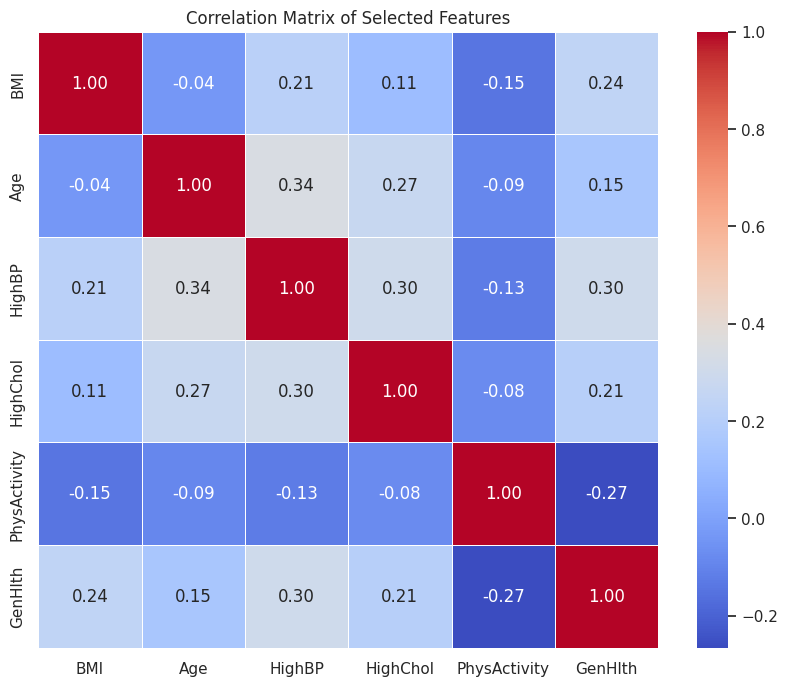

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Set style for seaborn
sns.set(style="white")

# Select important features
important_features = ['BMI', 'Age', 'HighBP', 'HighChol', 'PhysActivity', 'GenHlth']
df_selected = df.select(important_features)

# Calculate correlation matrix
correlation_matrix = []
for col1 in important_features:
    row = []
    for col2 in important_features:
        row.append(df_selected.stat.corr(col1, col2))
    correlation_matrix.append(row)

# Convert correlation matrix to Pandas DataFrame for visualization
import pandas as pd
correlation_df = pd.DataFrame(correlation_matrix, columns=important_features, index=important_features)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()


**6.	How are age categories distributed among individuals with and without diabetes?**

In [ ]:
# Group by diabetes status and age, and count each group
age_diabetes_distribution = df.groupBy("Diabetes_binary", "Age").count()

# Show the distribution
age_diabetes_distribution.show()

+---------------+---+-----+
|Diabetes_binary|Age|count|
+---------------+---+-----+
|              0| 13|14154|
|              1|  7| 3088|
|              1|  2|  140|
|              0|  7|23226|
|              1|  9| 5733|
|              0|  5|15106|
|              1|  1|   78|
|              1|  3|  314|
|              1| 11| 5141|
|              1|  4|  626|
|              0| 10|25636|
|              1|  8| 4263|
|              0|  9|27511|
|              0| 11|18392|
|              0|  1| 5622|
|              1| 12| 3403|
|              0|  8|26569|
|              1|  5| 1051|
|              0|  6|18077|
|              0|  2| 7458|
+---------------+---+-----+
only showing top 20 rows



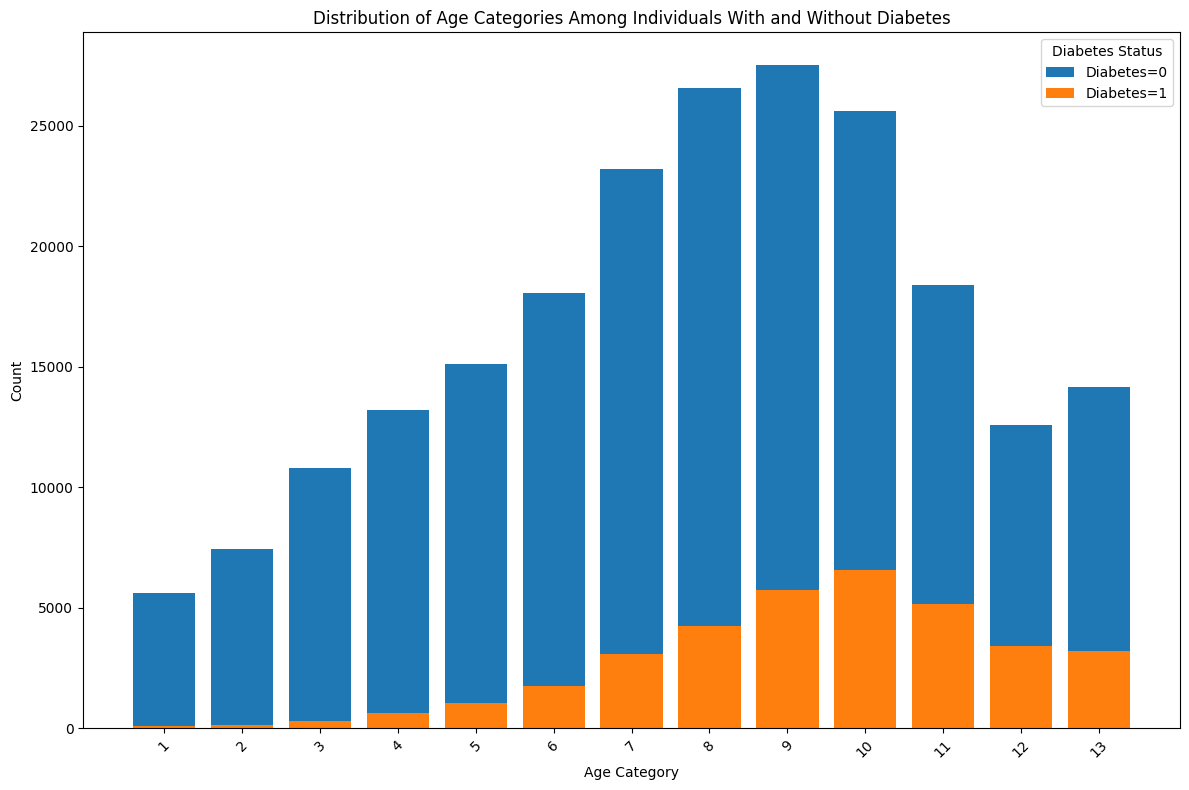

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = age_diabetes_distribution.toPandas()
pandas_df.sort_values(by=['Diabetes_binary', 'Age'], inplace=True)

# Plotting the distribution
plt.figure(figsize=(12, 8))
for key, group in pandas_df.groupby('Diabetes_binary'):
    plt.bar(group['Age'].astype(str), group['count'], label=f'Diabetes={key}')

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories Among Individuals With and Without Diabetes')
plt.legend(title='Diabetes Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**7.	Are there any visible patterns between lifestyle factors (smoking, alcohol consumption, physical activity) and diabetes?**

In [ ]:
from pyspark.sql import functions as F

# Group by Smoker, HvyAlcoholConsump, PhysActivity, and Diabetes_binary, then count each group
lifestyle_diabetes = df.groupBy("Smoker", "HvyAlcoholConsump", "PhysActivity", "Diabetes_binary").count()

# Show the results
lifestyle_diabetes.show()

+------+-----------------+------------+---------------+-----+
|Smoker|HvyAlcoholConsump|PhysActivity|Diabetes_binary|count|
+------+-----------------+------------+---------------+-----+
|     0|                0|           0|              1| 5826|
|     1|                0|           1|              1|10771|
|     1|                1|           0|              0| 2122|
|     1|                1|           1|              1|  390|
|     0|                1|           0|              1|   77|
|     0|                0|           0|              0|23028|
|     1|                0|           0|              0|22819|
|     0|                1|           1|              0| 4044|
|     0|                0|           1|              1|10990|
|     0|                1|           1|              1|  136|
|     0|                0|           1|              0|96424|
|     0|                1|           0|              0|  732|
|     1|                0|           0|              1| 6927|
|     1|

In [ ]:
# Calculate the total count of individuals by lifestyle factors
total_by_lifestyle = lifestyle_diabetes.groupBy("Smoker", "HvyAlcoholConsump", "PhysActivity").agg(F.sum("count").alias("Total"))

# Join the counts with total counts to calculate proportions
proportion_lifestyle_diabetes = lifestyle_diabetes.join(total_by_lifestyle, ["Smoker", "HvyAlcoholConsump", "PhysActivity"])
proportion_lifestyle_diabetes = proportion_lifestyle_diabetes.withColumn("Proportion", F.col("count") / F.col("Total"))

# Show the proportion table
proportion_lifestyle_diabetes.show()


+------+-----------------+------------+---------------+-----+------+-------------------+
|Smoker|HvyAlcoholConsump|PhysActivity|Diabetes_binary|count| Total|         Proportion|
+------+-----------------+------------+---------------+-----+------+-------------------+
|     0|                1|           1|              1|  136|  4180|0.03253588516746411|
|     0|                1|           1|              0| 4044|  4180| 0.9674641148325359|
|     0|                0|           0|              0|23028| 28854| 0.7980869203576627|
|     0|                0|           0|              1| 5826| 28854| 0.2019130796423373|
|     1|                0|           1|              0|62639| 73410| 0.8532761204195614|
|     1|                0|           1|              1|10771| 73410|0.14672387958043864|
|     1|                1|           1|              0| 6526|  6916|  0.943609022556391|
|     1|                1|           1|              1|  390|  6916|0.05639097744360902|
|     1|             

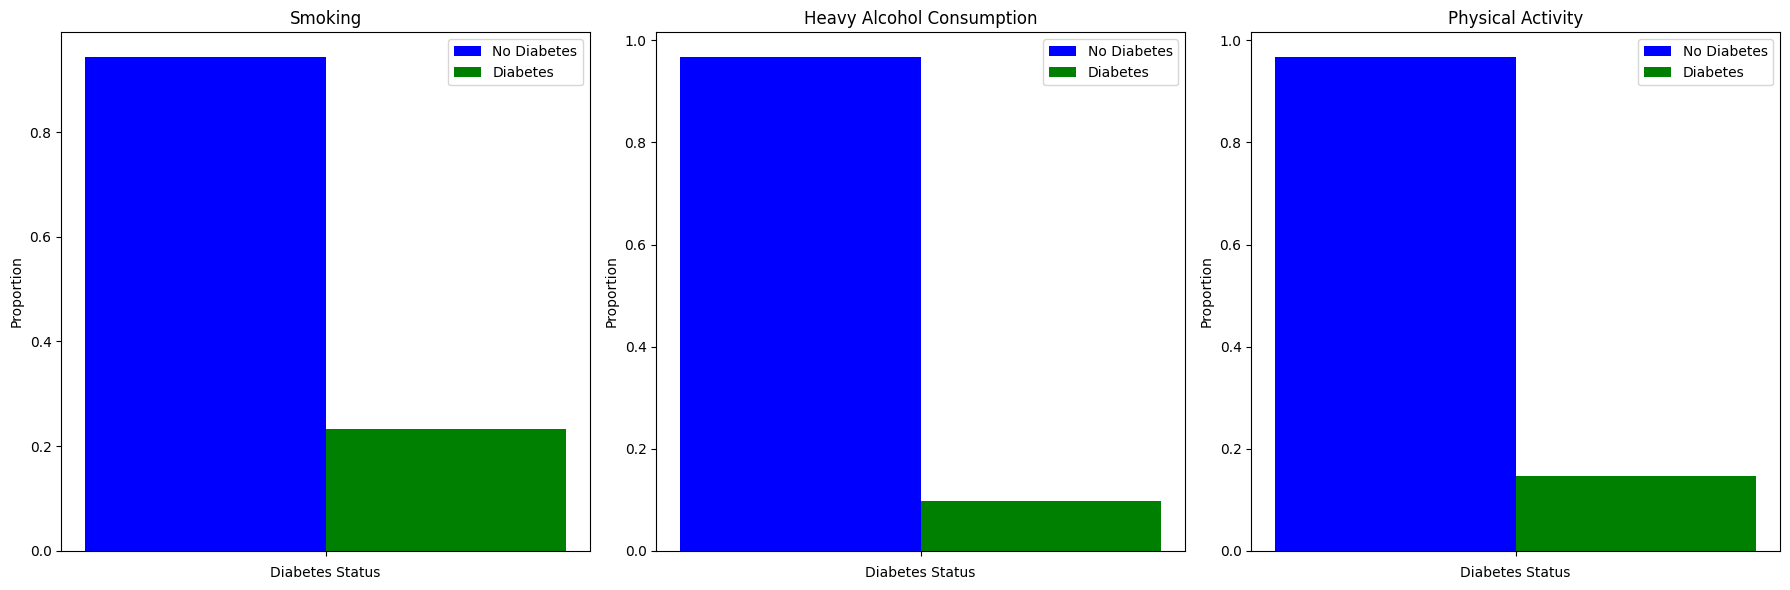

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Assume 'proportion_lifestyle_diabetes' is already computed and converted to a pandas dataframe.
# Convert Spark DataFrame to Pandas DataFrame for easier plotting
pandas_df = proportion_lifestyle_diabetes.toPandas()

# Define the lifestyle factors and their titles for plotting
lifestyle_factors = ['Smoker', 'HvyAlcoholConsump', 'PhysActivity']
titles = ['Smoking', 'Heavy Alcohol Consumption', 'Physical Activity']

# Prepare the plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the layout to be horizontal

# Loop through each lifestyle factor to create a subplot
for i, factor in enumerate(lifestyle_factors):
    # Filter data for current factor
    subset = pandas_df[pandas_df[factor] == 1]

    # For each diabetes status (0 or 1), get proportions
    no_diabetes = subset[subset['Diabetes_binary'] == 0]['Proportion'].values
    diabetes = subset[subset['Diabetes_binary'] == 1]['Proportion'].values

    # Create bar positions
    bar_width = 0.35
    index = np.arange(1)

    # Plot each bar
    bars1 = axes[i].bar(index, no_diabetes, bar_width, label='No Diabetes', color='blue')
    bars2 = axes[i].bar(index + bar_width, diabetes, bar_width, label='Diabetes', color='green')

    # Customize subplot
    axes[i].set_title(titles[i])
    axes[i].set_xticks(index + bar_width / 2)
    axes[i].set_xticklabels([''])
    axes[i].set_xlabel('Diabetes Status')
    axes[i].set_ylabel('Proportion')
    axes[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**8. What is the relationship between general health (GenHlth) and diabetes?**

<ipython-input-16-a7fe589b7319>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="GenHlth", y="Proportion_with_Diabetes", data=genhlth_diabetes_df, palette="viridis")


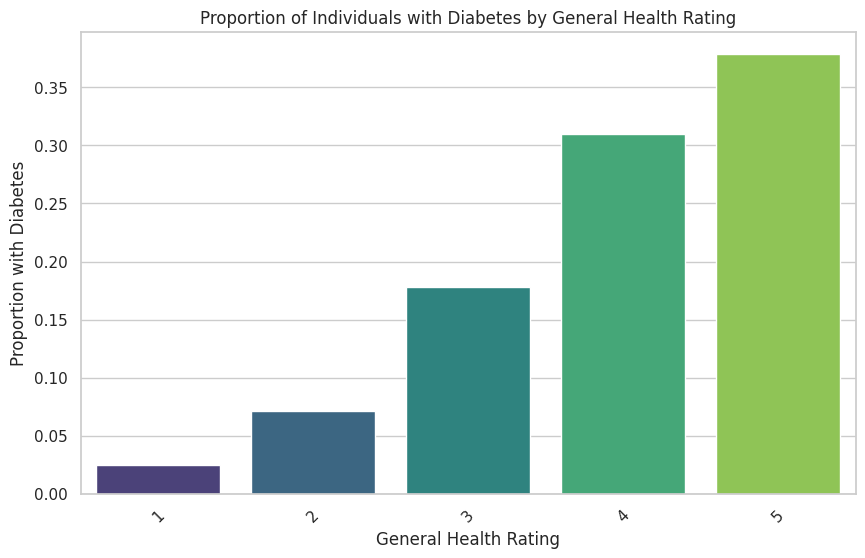

In [16]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Calculate the proportion of individuals with diabetes for each general health rating
genhlth_diabetes_df = df.groupBy("GenHlth").agg(avg(col("Diabetes_binary")).alias("Proportion_with_Diabetes"))
genhlth_diabetes_df = genhlth_diabetes_df.orderBy("GenHlth").toPandas()  # Ordering by general health rating for meaningful plotting

# Plotting the result
plt.figure(figsize=(10, 6))
sns.barplot(x="GenHlth", y="Proportion_with_Diabetes", data=genhlth_diabetes_df, palette="viridis")
plt.title('Proportion of Individuals with Diabetes by General Health Rating')
plt.xlabel('General Health Rating')
plt.ylabel('Proportion with Diabetes')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

**9. How does education level affect the likelihood of having diabetes?**

<ipython-input-17-1fe76ca35cbf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Education", y="Proportion_with_Diabetes", data=education_diabetes_df, palette="viridis")


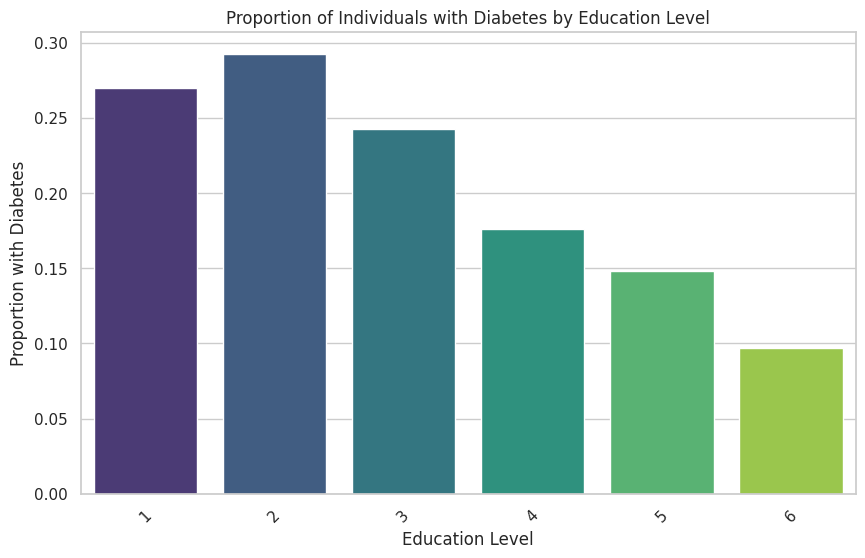

In [17]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Calculate the proportion of individuals with diabetes for each education level
education_diabetes_df = df.groupBy("Education").agg(avg(col("Diabetes_binary")).alias("Proportion_with_Diabetes"))
education_diabetes_df = education_diabetes_df.orderBy("Education").toPandas()  # Ordering by education level for meaningful plotting

# Plotting the result
plt.figure(figsize=(10, 6))
sns.barplot(x="Education", y="Proportion_with_Diabetes", data=education_diabetes_df, palette="viridis")
plt.title('Proportion of Individuals with Diabetes by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion with Diabetes')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

**10. How does physical activity impact the risk of diabetes?**

<ipython-input-18-6e5e1e056634>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PhysActivity", y="Proportion_with_Diabetes", data=activity_diabetes_df, palette="viridis")


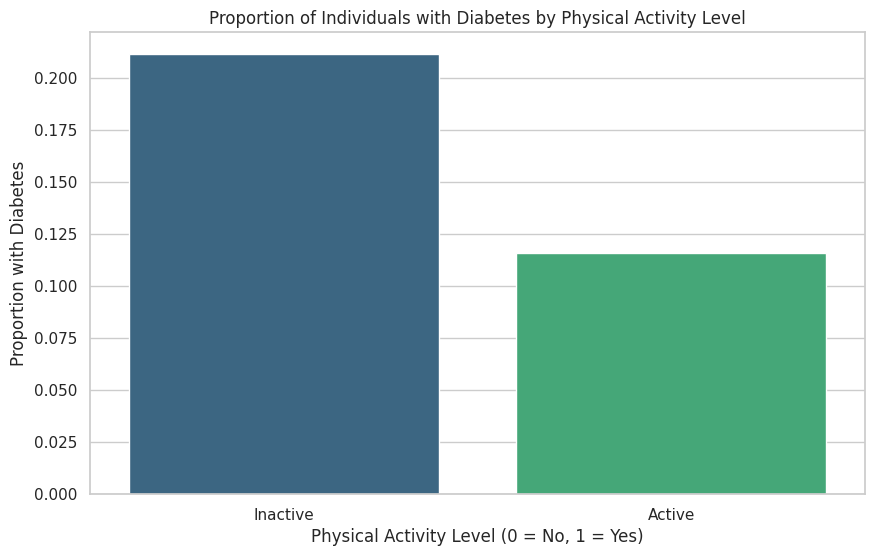

In [18]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Calculate the proportion of individuals with diabetes for each level of physical activity
activity_diabetes_df = df.groupBy("PhysActivity").agg(avg(col("Diabetes_binary")).alias("Proportion_with_Diabetes"))
activity_diabetes_df = activity_diabetes_df.orderBy("PhysActivity").toPandas()  # Ordering by physical activity level for meaningful plotting

# Plotting the result
plt.figure(figsize=(10, 6))
sns.barplot(x="PhysActivity", y="Proportion_with_Diabetes", data=activity_diabetes_df, palette="viridis")
plt.title('Proportion of Individuals with Diabetes by Physical Activity Level')
plt.xlabel('Physical Activity Level (0 = No, 1 = Yes)')
plt.ylabel('Proportion with Diabetes')
plt.xticks([0, 1], ['Inactive', 'Active'])  # Assuming 0 is inactive and 1 is active
plt.show()

**11. What is the impact of mental health (MentHlth) and physical health (PhysHlth) on diabetes?**

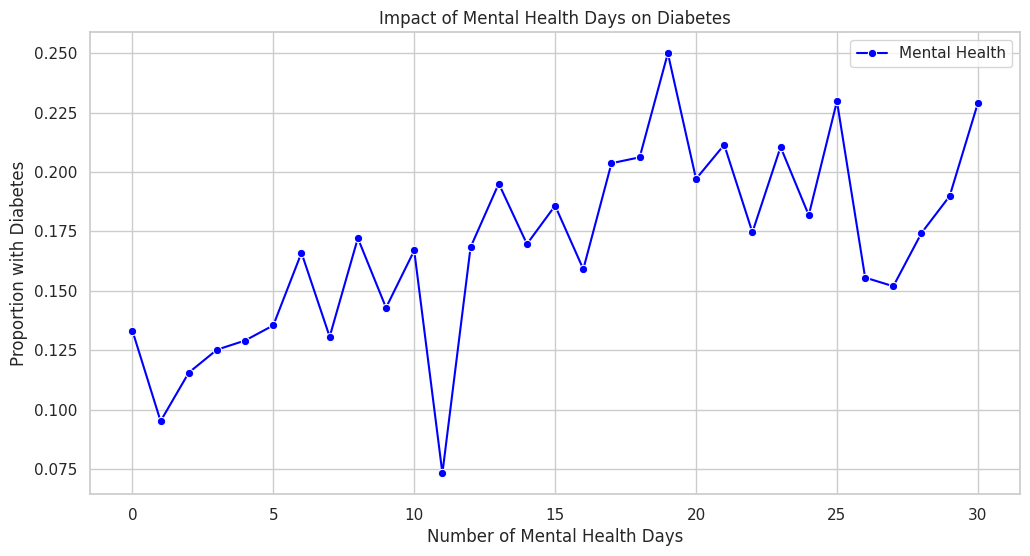

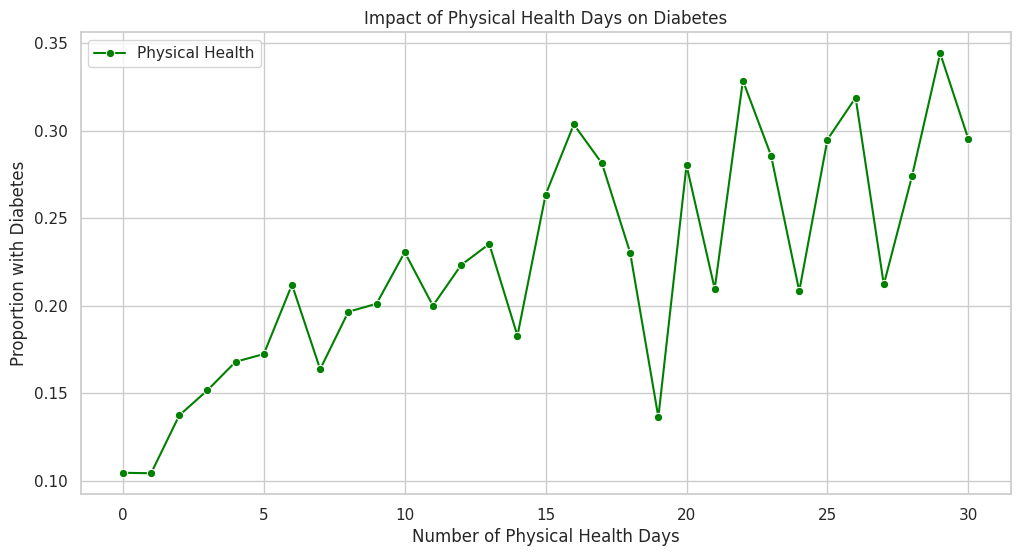

In [19]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Calculate the average diabetes occurrence for different levels of mental health days
menthlth_diabetes_df = df.groupBy("MentHlth").agg(avg(col("Diabetes_binary")).alias("Proportion_with_Diabetes"))
menthlth_diabetes_df = menthlth_diabetes_df.orderBy("MentHlth").toPandas()

# Calculate the average diabetes occurrence for different levels of physical health days
physlth_diabetes_df = df.groupBy("PhysHlth").agg(avg(col("Diabetes_binary")).alias("Proportion_with_Diabetes"))
physlth_diabetes_df = physlth_diabetes_df.orderBy("PhysHlth").toPandas()

# Plotting the results for Mental Health
plt.figure(figsize=(12, 6))
sns.lineplot(x="MentHlth", y="Proportion_with_Diabetes", data=menthlth_diabetes_df, marker='o', color='blue', label='Mental Health')
plt.title('Impact of Mental Health Days on Diabetes')
plt.xlabel('Number of Mental Health Days')
plt.ylabel('Proportion with Diabetes')
plt.legend()

# Plotting the results for Physical Health
plt.figure(figsize=(12, 6))
sns.lineplot(x="PhysHlth", y="Proportion_with_Diabetes", data=physlth_diabetes_df, marker='o', color='green', label='Physical Health')
plt.title('Impact of Physical Health Days on Diabetes')
plt.xlabel('Number of Physical Health Days')
plt.ylabel('Proportion with Diabetes')
plt.legend()

plt.show()

**12. Is difficulty walking (DiffWalk) associated with higher diabetes incidence?**

<ipython-input-20-f1c6b28b1ddb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DiffWalk", y="Proportion_with_Diabetes", data=diffwalk_diabetes_df, palette="viridis")


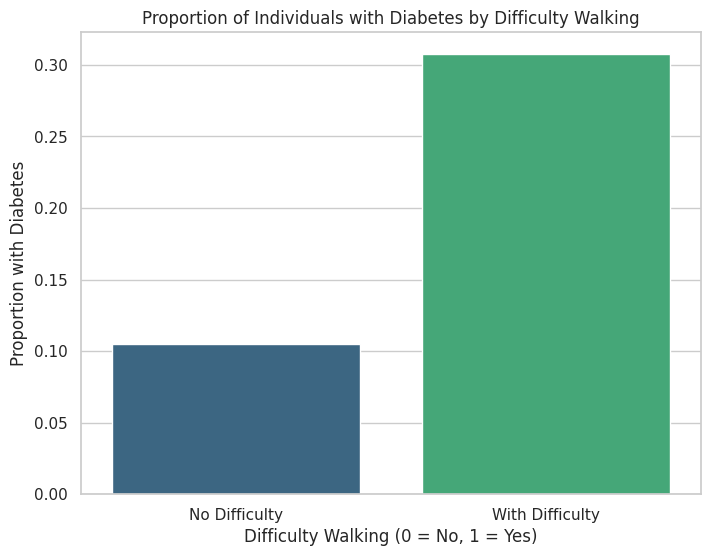

In [20]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Calculate the proportion of individuals with diabetes for each state of difficulty walking
diffwalk_diabetes_df = df.groupBy("DiffWalk").agg(avg(col("Diabetes_binary")).alias("Proportion_with_Diabetes"))
diffwalk_diabetes_df = diffwalk_diabetes_df.orderBy("DiffWalk").toPandas()  # Order for logical display in plot

# Plotting the result
plt.figure(figsize=(8, 6))
sns.barplot(x="DiffWalk", y="Proportion_with_Diabetes", data=diffwalk_diabetes_df, palette="viridis")
plt.title('Proportion of Individuals with Diabetes by Difficulty Walking')
plt.xlabel('Difficulty Walking (0 = No, 1 = Yes)')
plt.ylabel('Proportion with Diabetes')
plt.xticks([0, 1], ['No Difficulty', 'With Difficulty'])  # Assuming 0 is no difficulty and 1 is with difficulty
plt.show()

**13. Which features are most predictive of diabetes according to simple statistical tests?**

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import ChiSquareTest
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col


Perform Chi-squared Test for Categorical Features

In [ ]:
# Categorical features
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

# Assemble a vector of features
assembler = VectorAssembler(inputCols=categorical_features, outputCol="features")
featured_data = assembler.transform(df)

# Include diabetes status
featured_data = featured_data.withColumn("label", df["Diabetes_binary"].cast('double'))

# Conduct Chi-square test
r = ChiSquareTest.test(featured_data, "features", "label").head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))


pValues: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.220446049250313e-16,0.0,0.0,0.0]
degreesOfFreedom: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
statistics: [17563.981298751656,10175.245093564194,1063.9244152298331,937.4090965946261,2840.46513056138,7972.90844937914,3540.2142015854865,421.856000427577,812.2236354316332,825.834022870207,67.02975520078509,250.64056159342346,12094.00526609052,250.596462669135]


Analyzing Continuous Features

In [ ]:
# Continuous features
continuous_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']

# Function to compute t-test like statistics (manual calculation)
from math import sqrt
def t_test(feature):
    stats = df.groupBy("Diabetes_binary").agg(
        F.mean(feature).alias('mean'),
        F.stddev(feature).alias('stddev'),
        F.count(feature).alias('count')
    ).collect()

    mean0, stddev0, count0 = stats[0]['mean'], stats[0]['stddev'], stats[0]['count']
    mean1, stddev1, count1 = stats[1]['mean'], stats[1]['stddev'], stats[1]['count']

    # Compute pooled standard deviation and t-statistic
    pooled_std = sqrt(((count0 - 1) * stddev0**2 + (count1 - 1) * stddev1**2) / (count0 + count1 - 2))
    t_stat = (mean0 - mean1) / (pooled_std * sqrt(1/count0 + 1/count1))

    return t_stat

t_stats = {feature: t_test(feature) for feature in continuous_features}
print(t_stats)


{'BMI': 111.87814193117399, 'GenHlth': 154.6756764476623, 'MentHlth': 34.99572246482062, 'PhysHlth': 87.59148183404126, 'Age': 90.81225844595514}


Visualization

<ipython-input-42-b5aad68459a4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='P-Value', y='Feature', data=p_value_df.sort_values('P-Value'), palette='coolwarm')


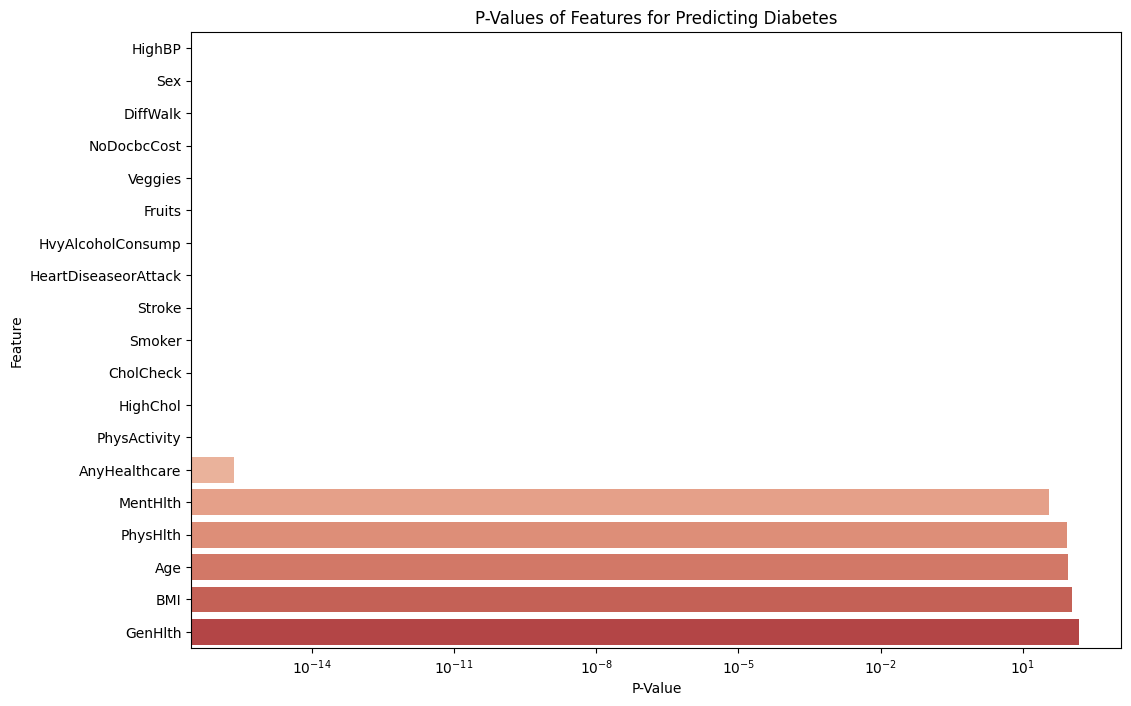

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming r.pValues and t_stats are available
p_values_dict = dict(zip(categorical_features, r.pValues))  # from Chi-square
p_values_dict.update(t_stats)  # Adding t-statistics

# Create DataFrame for visualization
p_value_df = pd.DataFrame(list(p_values_dict.items()), columns=['Feature', 'P-Value'])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='P-Value', y='Feature', data=p_value_df.sort_values('P-Value'), palette='coolwarm')
plt.title('P-Values of Features for Predicting Diabetes')
plt.xlabel('P-Value')
plt.xscale('log')  # Use logarithmic scale for better visibility of small p-values
plt.show()


**14. Finding Feature Importance for Diabetes Prediction using Classification Method**

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier

# List all columns except the target variable 'Diabetes_binary'
feature_columns = df.columns
feature_columns.remove('Diabetes_binary')

# Assemble the vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
feature_vector_df = assembler.transform(df)

# Select only the necessary columns
final_data = feature_vector_df.select("features", "Diabetes_binary")


In [ ]:
# Initialize the classifier
rf = RandomForestClassifier(labelCol="Diabetes_binary", featuresCol="features", numTrees=100)

# Train the model
model = rf.fit(final_data)

# Get feature importances
importances = model.featureImportances


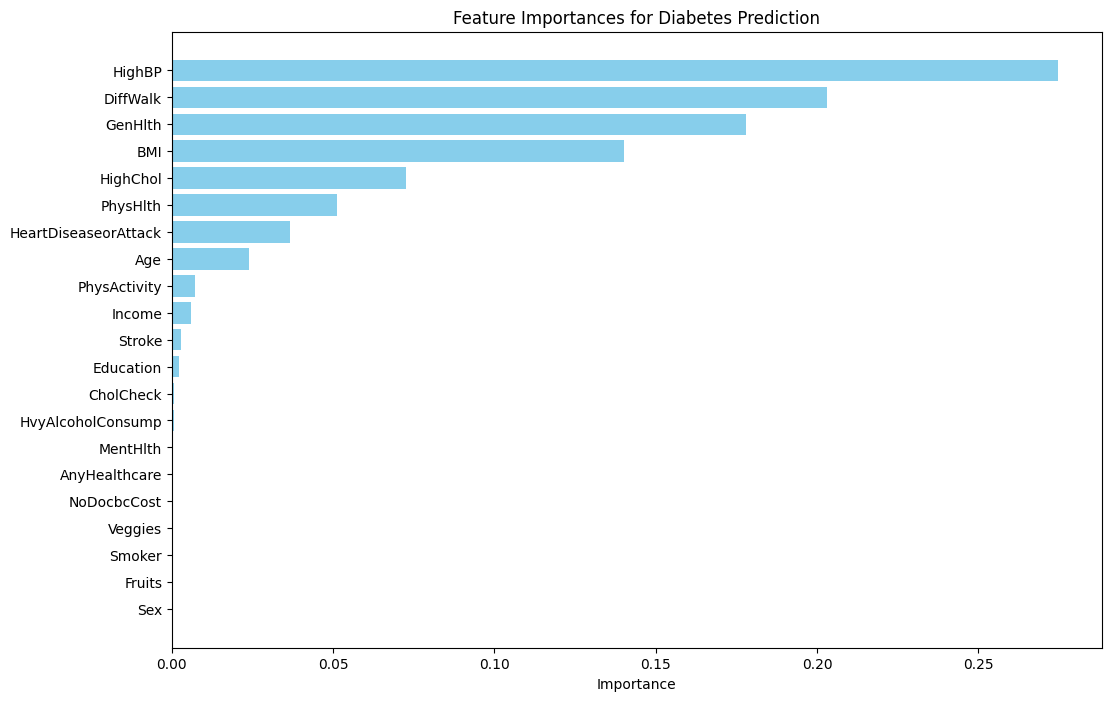

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert feature importances to a list and map them with feature column names
importances_list = importances.toArray()
feature_importance_dict = dict(zip(feature_columns, importances_list))

# Create a pandas DataFrame and sort it
feature_importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances for Diabetes Prediction')
plt.gca().invert_yaxis()  # Invert axis to have the most important features on top
plt.show()


**15. Do any variables need transformation (e.g., normalization, scaling) due to skewness or outliers?**

In [ ]:
from pyspark.sql.functions import skewness

# List of continuous variables
continuous_vars = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']

# Calculate skewness for each variable
skewness_data = {var: df.select(skewness(df[var]).alias(f'{var}_skewness')).collect()[0][f'{var}_skewness'] for var in continuous_vars}
print(skewness_data)

{'BMI': 2.121991210944589, 'GenHlth': 0.42286437471248434, 'MentHlth': 2.7211322755914997, 'PhysHlth': 2.207381862936719, 'Age': -0.3599011197688733}


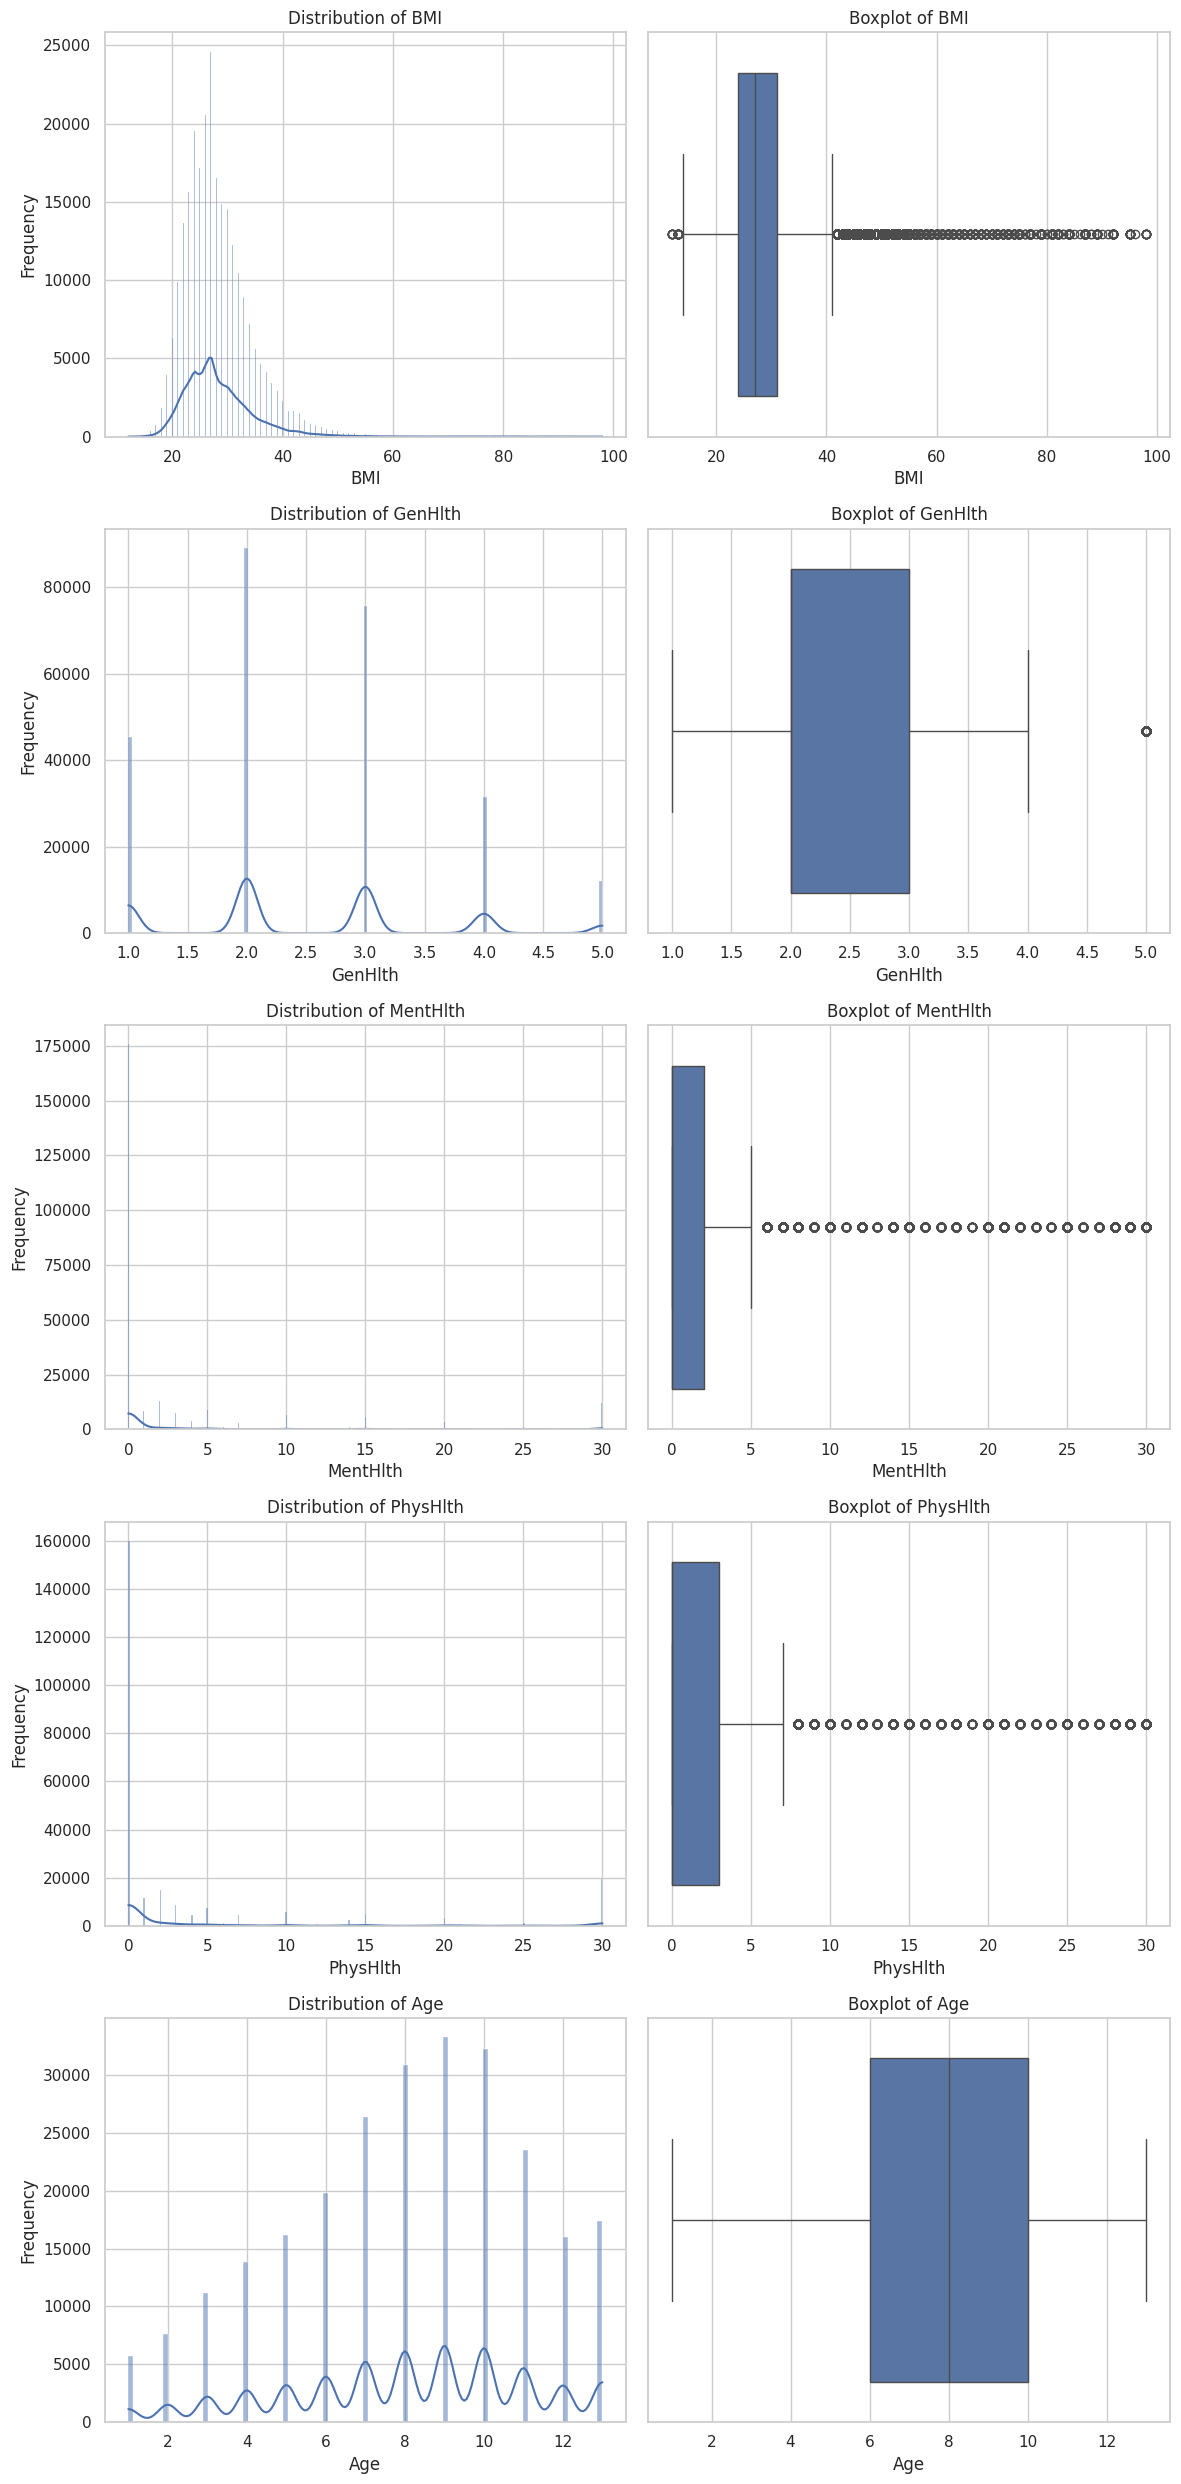

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = df.select(continuous_vars).toPandas()

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create histograms and boxplots for each continuous variable
fig, axes = plt.subplots(len(continuous_vars), 2, figsize=(12, len(continuous_vars) * 5))
for i, var in enumerate(continuous_vars):
    # Histogram for distribution
    sns.histplot(pandas_df[var], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {var}')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot for outliers
    sns.boxplot(x=pandas_df[var], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {var}')
    axes[i, 1].set_xlabel(var)

plt.tight_layout()
plt.show()
